# Part I - Prosper Loan Data
## by Hatif Naqvi

## Introduction
> This dataset explores a dataset of loans containing dollar values, term lengths, interest rates, fees, and id values, and non-numerical values such as loan status, occupation, and a variety dates.


## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
#!pip install seaborn --upgrade

In [3]:
#Load the dataset and skip bad lines of data for us to be able to process and describe it
import csv
df = pd.read_csv('prosperLoanData.csv', encoding='utf-8',error_bad_lines=False, engine="python")
df.head(6)

Skipping line 2767: unexpected end of data


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2765 entries, 0 to 2764
Data columns (total 81 columns):
ListingKey                             2765 non-null object
ListingNumber                          2765 non-null int64
ListingCreationDate                    2765 non-null object
CreditGrade                            668 non-null object
Term                                   2765 non-null int64
LoanStatus                             2765 non-null object
ClosedDate                             1282 non-null object
BorrowerAPR                            2764 non-null float64
BorrowerRate                           2765 non-null float64
LenderYield                            2765 non-null float64
EstimatedEffectiveYield                2093 non-null float64
EstimatedLoss                          2093 non-null float64
EstimatedReturn                        2093 non-null float64
ProsperRating (numeric)                2093 non-null float64
ProsperRating (Alpha)                  2093 non-n

In [5]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,2.765000e+03,2765.000000,2764.000000,2765.000000,2765.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,...,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000
mean,6.432191e+05,40.886799,0.217349,0.191058,0.180982,0.168768,0.080082,0.095601,4.082656,5.940277,...,-52.489024,-13.687527,634.658333,620.258181,22.630163,0.998865,0.040506,0.015913,9.842163,77.336347
std,3.307402e+05,10.393446,0.081029,0.075422,0.075132,0.068489,0.046836,0.030058,1.690811,2.375538,...,60.149196,107.954287,2224.686419,2206.735313,252.863814,0.015530,0.229408,0.133553,160.253474,104.933028
min,3.600000e+01,12.000000,0.016570,0.010000,0.005000,-0.067700,0.004900,-0.067700,1.000000,1.000000,...,-436.040000,-2806.040000,0.000000,-34.340000,0.000000,0.700500,0.000000,0.000000,0.000000,1.000000
25%,4.269200e+05,36.000000,0.154280,0.131400,0.121400,0.117800,0.042400,0.074080,3.000000,4.000000,...,-68.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,6.099420e+05,36.000000,0.205680,0.179500,0.169500,0.157670,0.069900,0.090500,4.000000,6.000000,...,-32.840000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,39.000000
75%,9.237810e+05,36.000000,0.283740,0.250000,0.240000,0.227400,0.112000,0.116000,5.000000,8.000000,...,-12.740000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,105.000000
max,1.246079e+06,60.000000,0.402430,0.350000,0.343000,0.305700,0.366000,0.257000,7.000000,11.000000,...,0.000000,0.000000,25000.000000,25000.000000,7940.240000,1.000000,4.000000,2.000000,6101.000000,844.000000


### What is the structure of your dataset?

> The dataset is composed of numerical values such as dollar values, term lengths, interest rates, fees, and id values, and non-numerical values such as loan status, occupation, and a variety dates.

### What is/are the main feature(s) of interest in your dataset?

> The main feature I want to explore is to understand what influences overall APR of a loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Some of the main features we want to look at the generally effect loans and loan values are: BorrowerRate, Occupation, Employment Status, EmploymentStatusDuration, Income_Range, CreditGrade, Term, LoanOriginalAmount, LP_CustomerPayments, DebtToIncomeRatio, InterestRateType, 'ProsperRating (Alpha)'

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

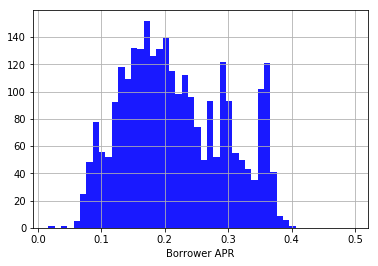

In [6]:
#plotting the fof the borrower APR
#plt.figure(figsize=(8,8))
bins = np.arange(min(df["BorrowerAPR"]), max(df["BorrowerAPR"])+0.1, 0.01)
#plt.hist(data = df, x = "BorrowerAPR", bins = bins)
plt.xlabel('Borrower APR')

df['BorrowerAPR'].hist(alpha=0.9, color='blue', bins = bins)

It looks like there is heavy distribution between 0.125 and 0.25 while there are some peaks at 0.3 and 0.35 meaning that majority of borrowers are getting high interest rates between 0.125 and 0.25 and some of those even higher.

(0, 30000)

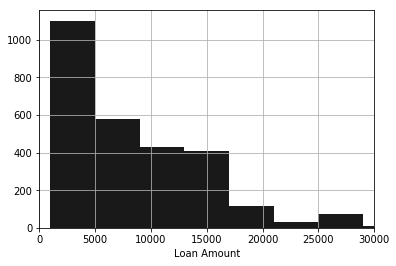

In [7]:
bins = np.arange(min(df["LoanOriginalAmount"]), max(df["LoanOriginalAmount"]), 4000)
#plt.hist(data = df, x = "BorrowerAPR", bins = bins)
plt.xlabel('Loan Amount')

df['LoanOriginalAmount'].hist(alpha=0.9, color='black', bins = bins)
plt.xlim([0, 30000])

> The distribution of the Loan Amount is skewed to the left and there is a high density of the loans between 0 and 10,000

Text(0.5,1,'Distribution Income Range of Loan Borrowers')

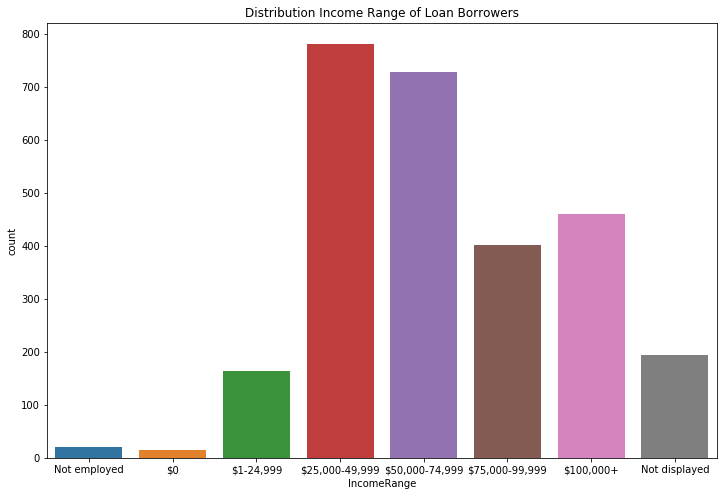

In [8]:
order = ['Not employed' ,'$0', '$1-24,999','$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not displayed' ]
plt.figure(figsize=(12,8))
sb.countplot(x="IncomeRange", data=df, order = order)
plt.title('Distribution Income Range of Loan Borrowers')

Over 60% of the of borrowers are making less than $75,000

Text(0.5,1,'Distribution Income Range of Loan Borrowers')

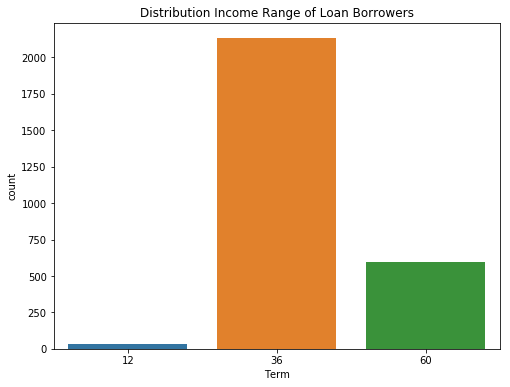

In [9]:
plt.figure(figsize=(8,6))
sb.countplot(x="Term", data=df)
plt.title('Distribution Income Range of Loan Borrowers')

We can say confidently that the most common loan period is 36 months or 3 years, however we do have loan terms also being 60 months

Text(0.5,1,'Distribution Credit Grade of Loan Borrowers')

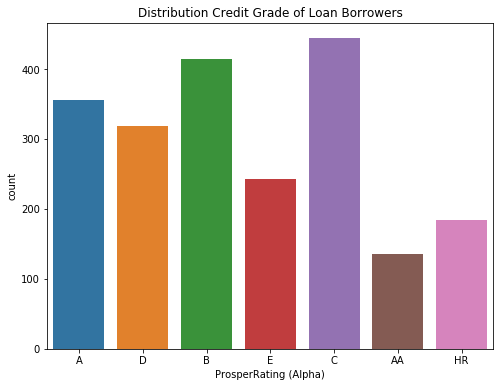

In [10]:
plt.figure(figsize=(8,6))
sb.countplot(x='ProsperRating (Alpha)', data=df)
plt.title('Distribution Credit Grade of Loan Borrowers')

There is a fairly decent distribution of Prosper Rating. Credit Grades of C, D, and B, and A happen to be the most common.

Text(0.5,0,'Borrow Rate')

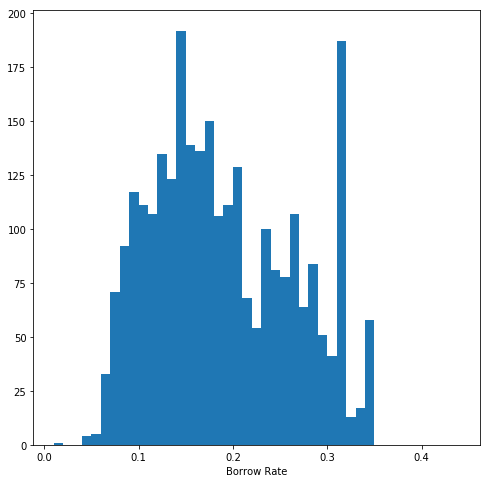

In [11]:
plt.figure(figsize = [8,8])
bins = np.arange(min(df["BorrowerRate"]), max(df["BorrowerRate"])+0.1, 0.01)
plt.hist(data = df, x = "BorrowerRate", bins = bins)
plt.xlabel('Borrow Rate')

The plot suggests that there aren't significant outliers within this group that could skew the graph. There is a larger cluster between 0.08 to 0.2% borrow rate. We also notice a peak at around 0.31% as wel. I minor outlier around the 0% but it is insignificant.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There were no unusual points here. What I noticed was that APR and Borrow Rate was majority between 0.04 to 0.4. There were no transformations required.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The Distribution of income was was skewed more to the right meaning that majority of the borrowers income was under $75,000. Another unusual distribution was of the BorrowerAPR there were two peaks of 0.1 and 0.2, and 0.3, and 0.37.

> There isn't any need to transform the data.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

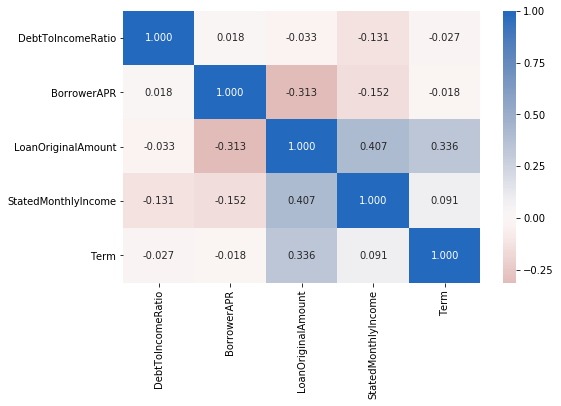

In [12]:
#we'll be making a heat map to showcase correlations between some of the variables
#BorrowerRate, Occupation, Employment Status, EmploymentStatusDuration
#Income_Range, CreditGrade, Term, LoanOriginalAmount, LP_CustomerPayments, DebtToIncomeRatio, InterestRateType
var = ['DebtToIncomeRatio', 'BorrowerAPR', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'Term']
plt.figure(figsize = [8, 5])
sb.heatmap(df[var].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

> In terms of correlation the BorrowerAPR has a very weak correlation with each other variable. It's influence in a sense is negligible. The Loan amount has a negative correlation of -0.313 which still weak but indicates that the higher the loan amount the lower in the Borrower APR

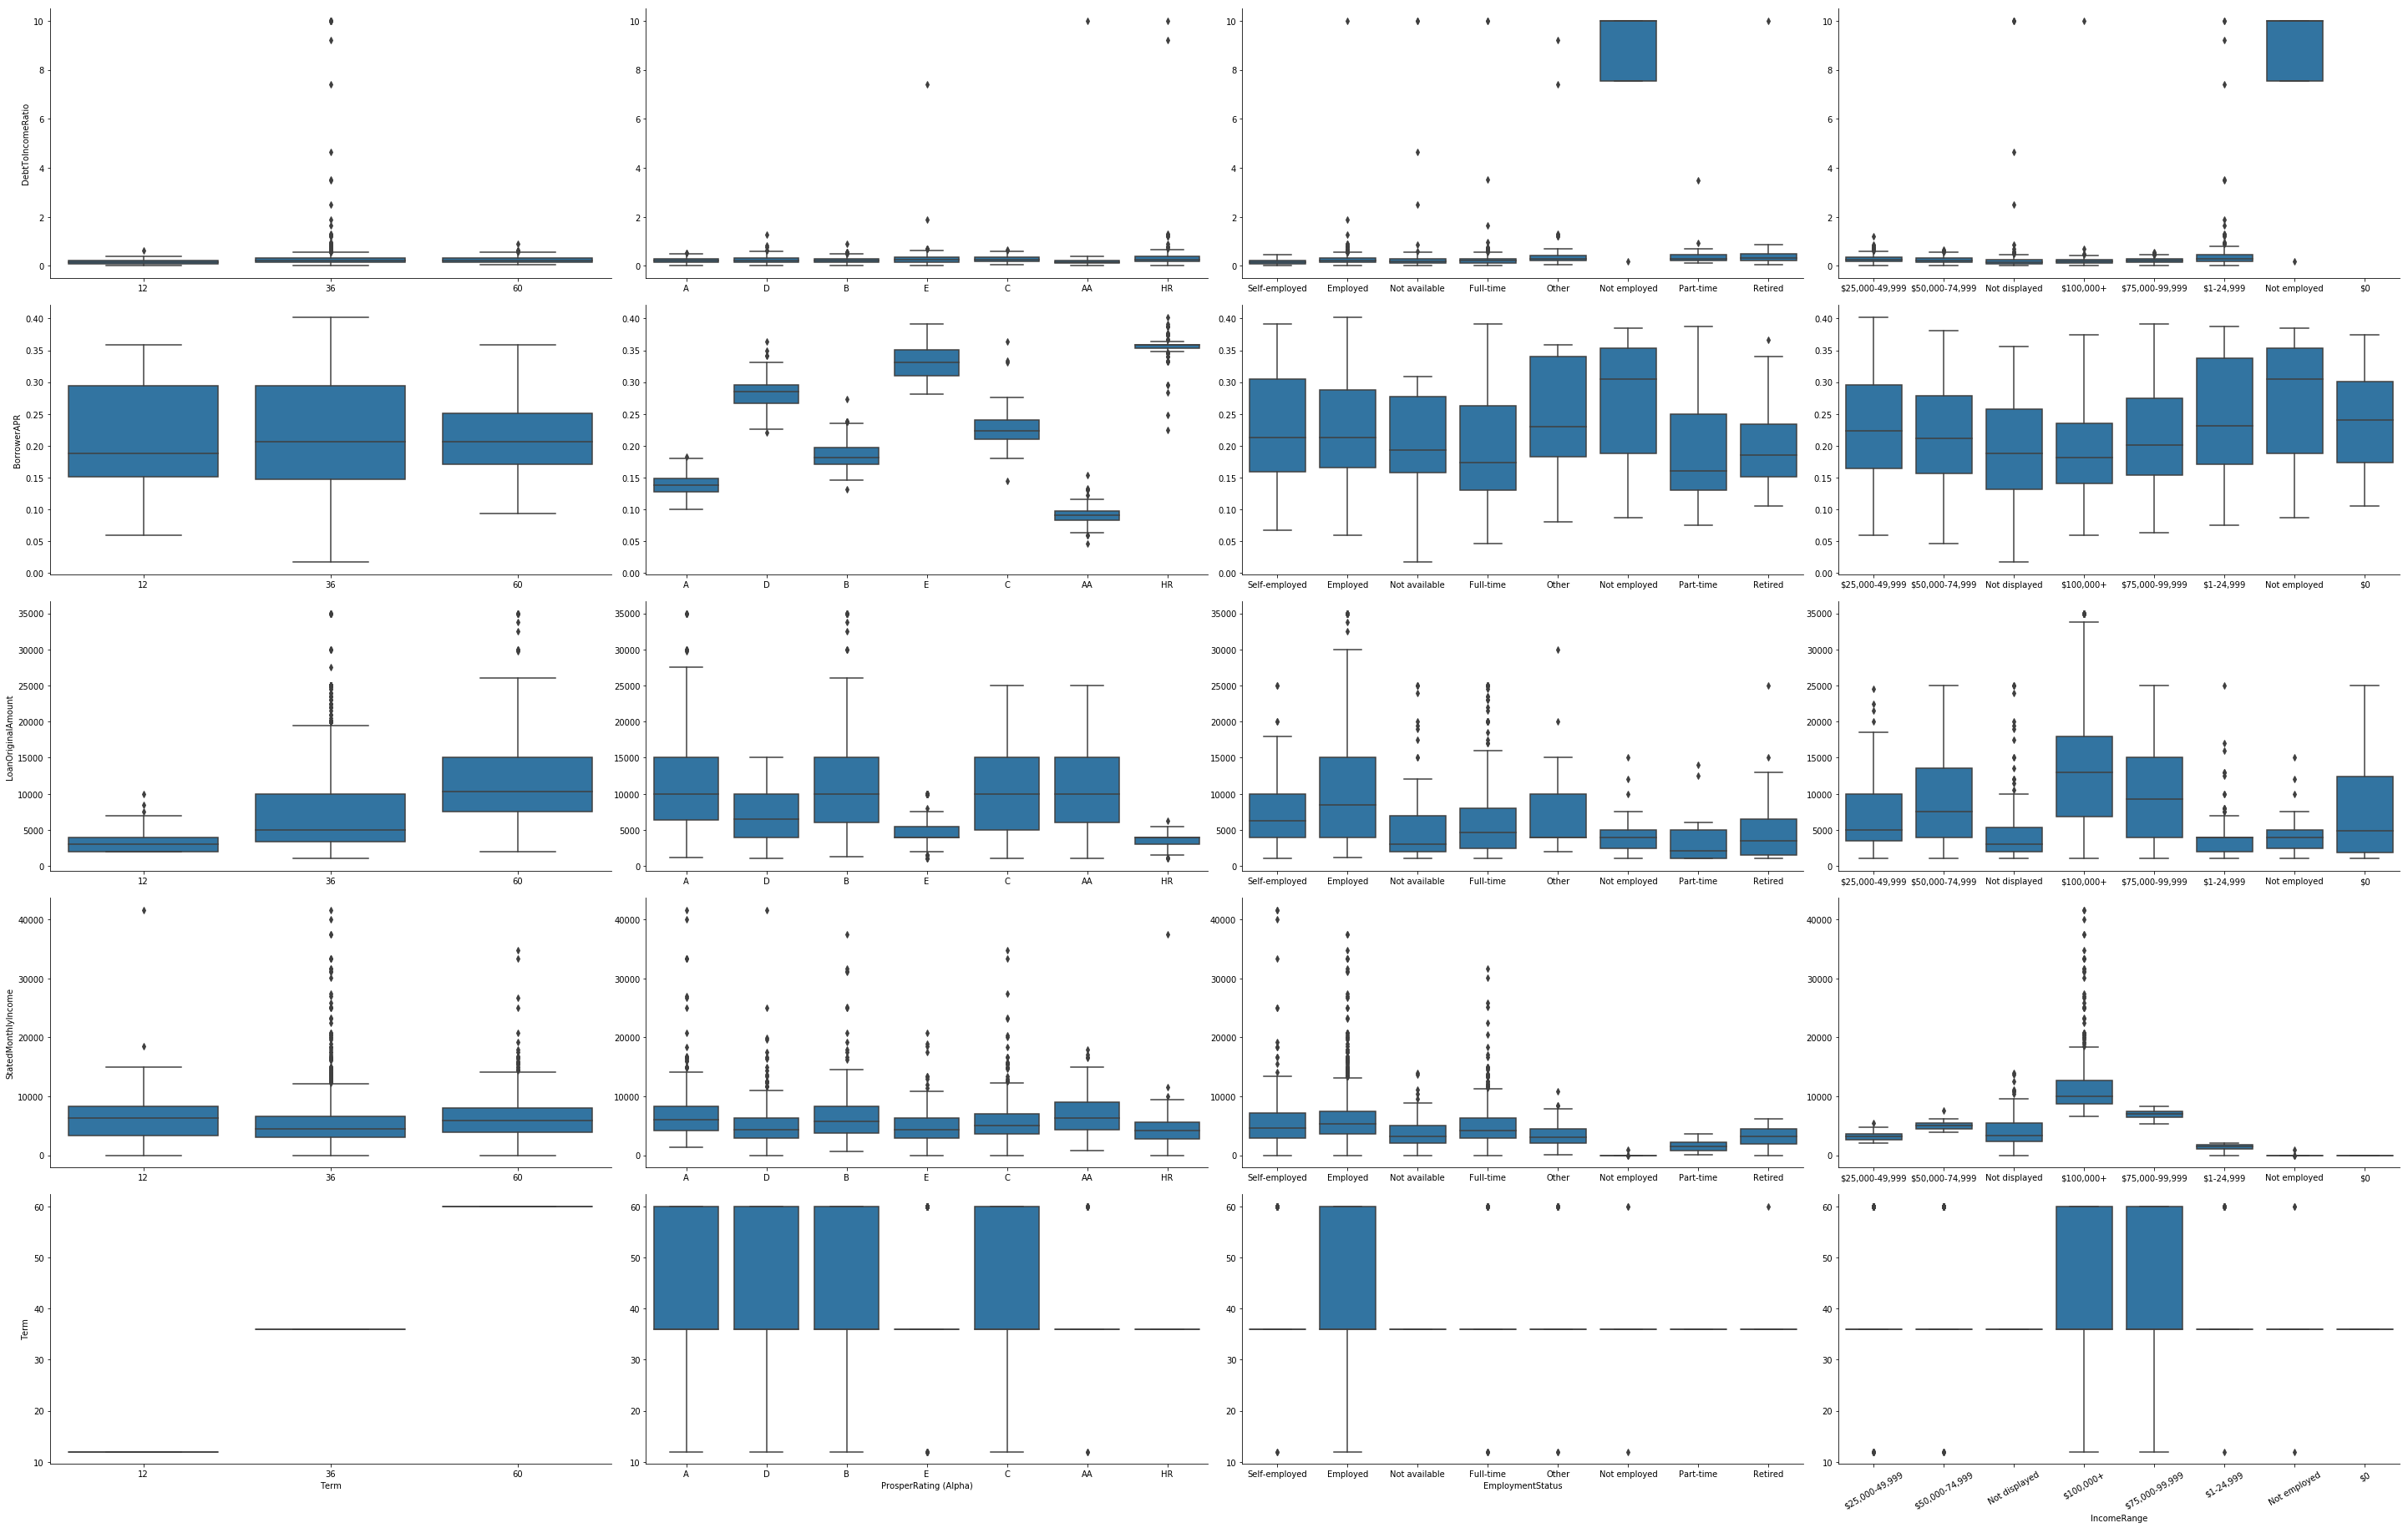

In [13]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

cat = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus', 'IncomeRange']
plt.figure(figsize = [12, 12])
g = sb.PairGrid(data = df, y_vars = var, x_vars = cat, size = 5, aspect = 2)
g.map(boxgrid)
plt.xticks(rotation=30)
plt.show();

> Interstingly, when the loan term increased we saw that that the median loan amount increase significantly from shorter term periods. The median Borrower APR for part-time employees is the lowest of all the employement statuses. The highest BorrowerAPR by prosper rating was Rating E. The 100k+ Income Range Group was able to get the highest loan amounts compared to any other group while also having the lowest median BorrowerAPR.

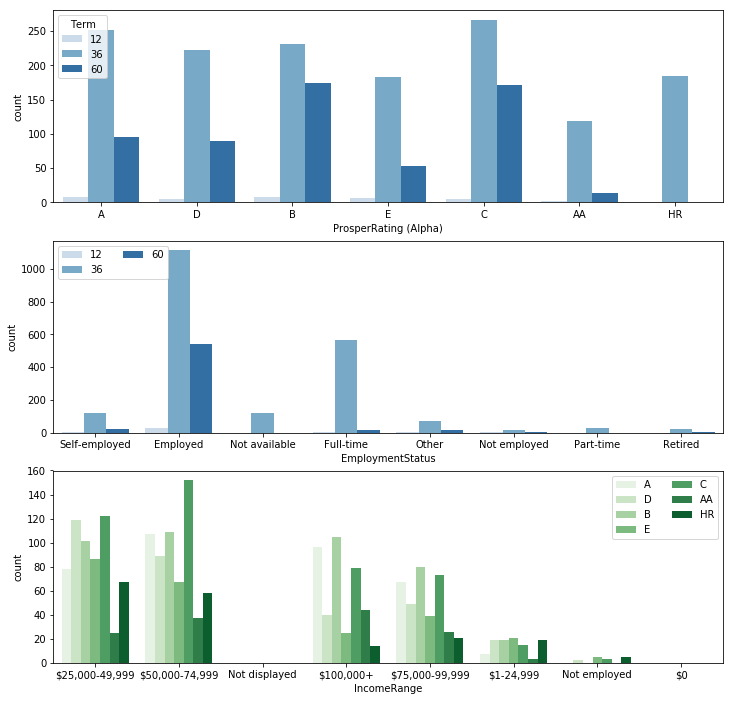

In [14]:
plt.figure(figsize = [12, 12])

cat = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus', 'IncomeRange']

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'IncomeRange', hue = 'ProsperRating (Alpha)', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

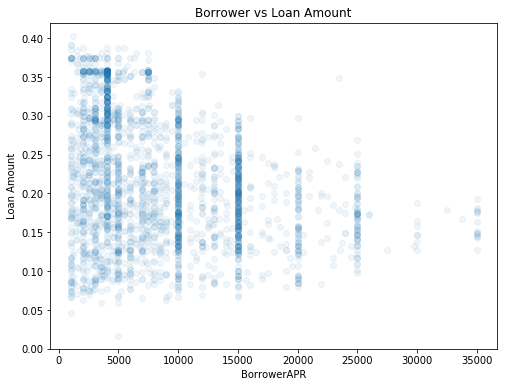

In [15]:
plt.figure(figsize = [8, 6])
plt.scatter(data = df, y = 'BorrowerAPR', x = 'LoanOriginalAmount', alpha = 1/15)
plt.ylim([0, 0.42])
plt.xlabel('BorrowerAPR')
#plt.yscale('log')
#plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Loan Amount')
plt.title('Borrower vs Loan Amount')
plt.show()

> What is interesting is the lower the Loan Amount the higher the BorrowerAPR. We can see that those who borrow 5000 get a APR of 0.3% to 0.36%. Those borrowing 10000 to 15000 their APR's are nearly half with the range being 0.125% to 0.25%. Something to look into is how income and ProsperRating influences APR.

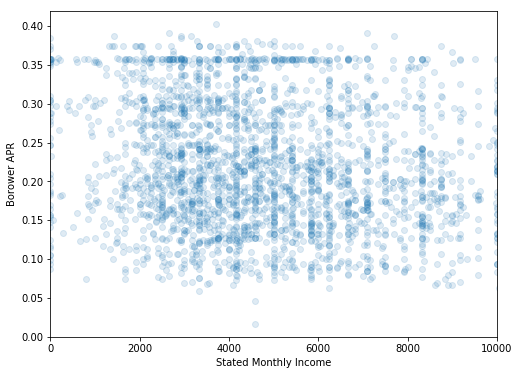

In [16]:
plt.figure(figsize = [8, 6])
plt.scatter(data = df, y = 'BorrowerAPR', x = 'StatedMonthlyIncome', alpha = 1/7)
plt.ylim([0, 0.42])
plt.ylabel('Borower APR')
plt.xlim([0, 10000])
plt.xlabel('Stated Monthly Income')
plt.show()

> Overall there is no trend of APR vs Stated Monthly Income. The APR is extremely scattered and the density by income is very inconsistant.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In terms of correlation the BorrowerAPR has a very weak correlation with each other variable. It's influence in a sense is negligible. The Loan amount has a negative correlation of -0.313 which still weak but indicates that the higher the loan amount the lower in the Borrower APR. Overall there aren't any linear relationships between the feature of interest vs other feature. The highest BorrowerAPR by prosper rating was Rating E. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The loan original amount is positively correlated with the stated monthly income but is of a medium strength ~0.4, which understandabley makes sense because those with more money can borrow more since they have the ability to pay back compared to those making less. When the loan term increased we saw that that the median loan amount increase significantly from shorter term periods. The median Borrower APR for part-time employees is the lowest of all the employement statuses. The 100k+ Income Range Group was able to get the highest loan amounts compared to any other group while also having the lowest median BorrowerAPR.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

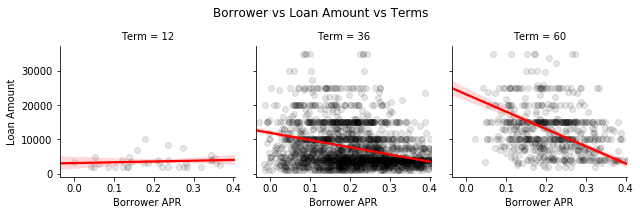

In [17]:
#Multivariate Analysis - Borrower vs Loan Amount vs Terms
#Overall, terms don't seem to have a significant factor on overall APR and Loan Amount.

plt.figure(figsize=[ 11.69, 8.27])
g = sb.FacetGrid(data = df, col = 'Term', col_wrap = 3, size = 3)
g.map(sb.regplot, 'BorrowerAPR', 'LoanOriginalAmount', x_jitter=0.1, 
     scatter_kws={'alpha':0.1, "color": "black"}, line_kws={"color": "red"})
g.set_xlabels('Borrower APR')
g.set_ylabels('Loan Amount')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Borrower vs Loan Amount vs Terms')
plt.show()

> Terms don't seem to have a significant factor on overall APR and Loan Amount

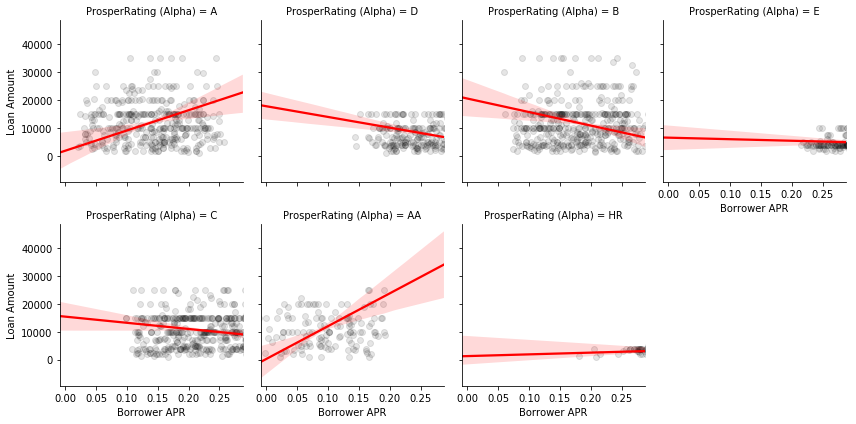

In [18]:
plt.figure(figsize = (12,8))
g = sb.FacetGrid(data = df, col = 'ProsperRating (Alpha)', col_wrap = 4, size = 3)
g.map(sb.regplot, 'BorrowerAPR', 'LoanOriginalAmount', x_jitter=0.1, 
     scatter_kws={'alpha':0.1, "color": "black"}, line_kws={"color": "red"})
g.set_xlabels('Borrower APR')
g.set_ylabels('Loan Amount')

plt.show()

> It's not surprising to see that as the loan rating increases so does the loan amount. If you look at the ProsperRating of AA. The Borrower APR also decreases for those that have a higher ProsperRating. The APR increases for those in higher ProsperRating as they try to borrow more which makes sense because its a way to defer people from borrow to much. On the other side the ProsperRatings that are much lower they generally have a higher APR because they likely have a harder chance paying back the loan.

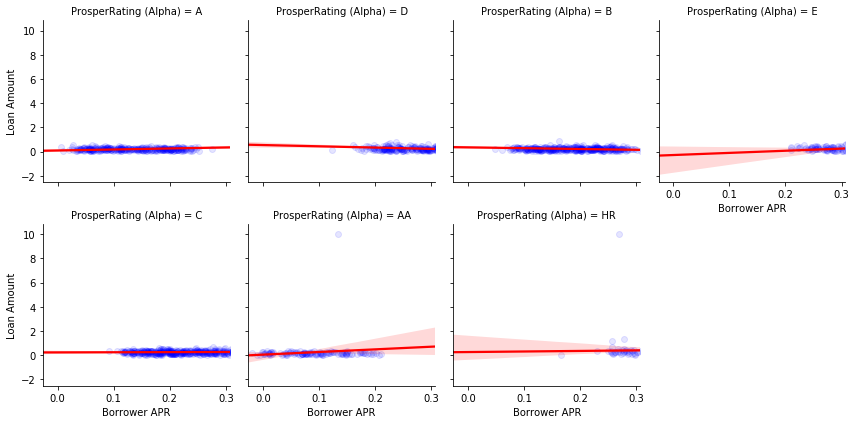

In [19]:
plt.figure(figsize = (12,8))
g = sb.FacetGrid(data = df, col = 'ProsperRating (Alpha)', col_wrap = 4, size = 3)
g.map(sb.regplot, 'BorrowerAPR', 'DebtToIncomeRatio', x_jitter=0.1, 
     scatter_kws={'alpha':0.1, "color": "blue"}, line_kws={"color": "red"})
g.set_xlabels('Borrower APR')
g.set_ylabels('Loan Amount')

plt.show()

> Debt to Income ratio doesn't play a significant factor on the Borrower APR.

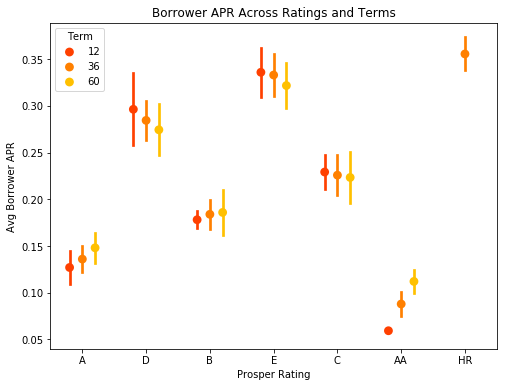

In [20]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'autumn', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR Across Ratings and Terms')
plt.ylabel('Avg Borrower APR')
plt.xlabel('Prosper Rating')
ax.set_yticklabels([],minor = True);

> The first thing I noticed is that Ratings AA to B it is more beneficial to have smaller length term loans because the APR's are much lower. While anything lower than a C Rating its better to have a longer length loan because the APR's lower. AA to B ratings have a mean ratings are under 0.2% APR while C Ratings and lower are all above 0.2%

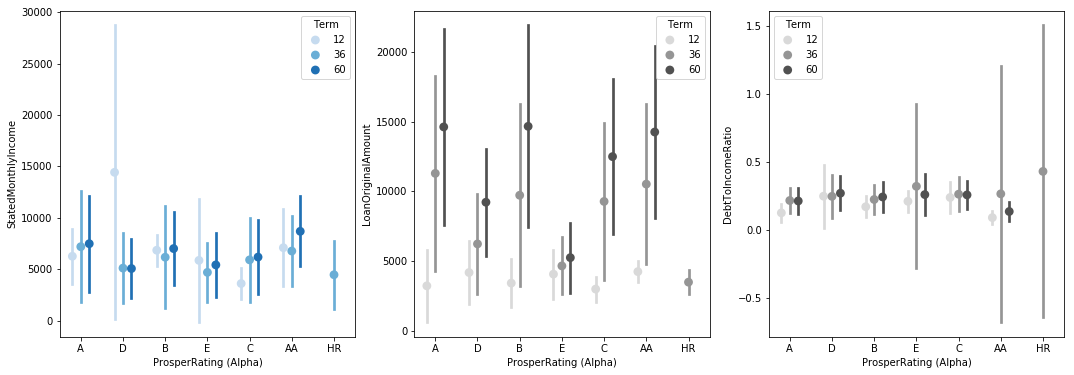

In [21]:
fig, ax = plt.subplots(ncols=3, figsize=[18,6])
sb.pointplot(data = df, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd', ax=ax[0])

sb.pointplot(data = df, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greys', linestyles = '', dodge = 0.4, ci='sd', ax=ax[1])

sb.pointplot(data = df, x = 'ProsperRating (Alpha)', y = 'DebtToIncomeRatio', hue = 'Term',
           palette = 'Greys', linestyles = '', dodge = 0.4, ci='sd', ax=ax[2])

> The Monthly Income doesn't show much effect in terms of rating and by term , there is a consistency across all the ProsperRatings besides the ProsperRating D with Term length of 12 months it is an outlier.

> The Loan Amount on the other hand there is a very high interaction and influence by term and rating. We can the ratings that are AA to B have a much higher income than the rest where they are all making nearly more than 10,000 a month. In these loans the loan amount increases as the terms increase, and the amplitude of the loan amount grows as well

> Lastly looking at the DebtToIncome Ratio. The term and rating have no real influence on the ratio itself. Most of the points are actually quite static across all ratings with an increase amplitude in E, AA, HR loans.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate exploration showed that the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings increased from HR to AA. The amplitude of the poorer rated loans was slightly larger compared to the better ratings. 
### Were there any interesting or surprising interactions between features?

> In my multivariate analysis I began to look at some more variables that may impact the BorrowerAPR such as Proper Rating and the DebtToIncomeRatio. In my exploration, the increase in terms and loan amount didn't play a significant factor on overall APR. It's not surprising to see that a higher loan rating led to a higher loan amount. This is visbile in ratings AA, A, and B.The APR increases for those in higher ProsperRating as they try to borrow more which makes sense because its a way to defer people from borrow to much. It is also more beneficial for those in higher loan ratings to borrow in shorter terms because the ARR is actually much lower on average. The overall loan amount is influenced significantly by the length of terms and ratings. While, the DebtToIncomeRatio has a very minimal influence from the terms and ratings.


## Conclusions
> The average BorrowerAPR is between 0.125% and 0.25% while there are some peaks at 0.3 and 0.35.

> There is a fairly decent distribution of Loan Credit Grade. Credit Grades of C, D, and B happen to be the most common (>100).

> The borrow rate clusters between 0.08 to 0.2%.

> The Loan amount has a negative correlation of -0.313 which still weak but indicates that the higher the loan amount the lower in the Borrower APR.

> Interstingly, when the loan term increased we saw that that the median loan amount increase significantly from shorter term periods.

> The median Borrower APR for part-time employees is the lowest of all the employement statuses. 

> The highest BorrowerAPR by prosper rating was Rating E. The 100k+ Income Range Group was able to get the highest loan amounts compared to any other group while also having the lowest median BorrowerAPR.

> The less you borrowed the higher the overall APR (>0.25%) was and this is a result of lower rating value.

> Vice-Versa, if you were able to borrow high amounts (>10000) your APR was much lower in comparison (<0.25%).

> The overall loan amount is influenced significantly by the length of terms and ratings.

> While, the DebtToIncomeRatio has a very minimal influence from the terms and ratings.

Overall, the influencing factors for the BorrowersAPR are the Loan Amount and the ProsperRating. Where the APR will decrease as the ProsperRating improves as will the Loan Amount.